<a href="https://colab.research.google.com/github/IvanIndargo/Datamining_exersice/blob/main/%5BQuestion%5D_Exercise_Week_4_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 4 : Classification Model


---

Today lab exercise will be using Penguin Dataset
- Download the **Penguin Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
species: penguin species (Chinstrap, Adélie, or Gentoo) <br>
culmen_length_mm: culmen length (mm) <br>
culmen_depth_mm: culmen depth (mm) <br>
flipper_length_mm: flipper length (mm) <br>
body_mass_g: body mass (g) <br>
island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica) <br>
sex: penguin sex <br>

What are culmen length & depth? <br>
The culmen is "the upper ridge of a bird's beak" (definition from Oxford Languages).

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

## Load Dataset

1. Import dataset <br>
Display 10 sample rows from the dataset

In [ ]:
#1
df=pd.read_csv("https://raw.githubusercontent.com/IvanIndargo/dataset-DM/refs/heads/main/penguins_size.csv")
df.head(n=10)

#code pd.read ini digunakan agar dataset dapat dibaca untuk dapat melakukan analisa
#sedangkan code df.head digunakan untuk kita menampilkan sample dataset dan n adalah jumlah baris yang ingin ditampilkan

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


## Exploratory Data Analysis

2. Display the info column and conclude what the insight is from that column

In [ ]:
#2
df.info()

#code ini digunakan untuk menunjukkan info dari dataset yang telah diload
#code ini digunakan untuk memudahkan kita agar dapat melihat tipe data dari dataset, nama kolom yang terdapat di daataset, melihat junlah kolom di dataset
#selain itu code ini digunakan untuk melihat apakah ada nilai null di dalam dataset dan jumlah seluruh baris dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


3. Show describe column and conclude what the insight is from that column

In [ ]:
#3
df.describe()

#code ini digunakan untuk melihat dan menampilkan deskripsi dari dataset berupa nilai maksimal, nilai minimal, rata-rata, standar devisiasi, nilai tengah dan lainnya
#code ini menampilkan seluruh deskripsi dari masing masing kolom dataset untuk memudahkan analisa

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


4. display the number of each unique value in species, island, and sex columns (including NaN)

In [ ]:
#4
colom = {'species', 'island', 'sex'}
for col in colom:
  print(df[col].value_counts())

#code ini digunakan untuk menampilkan isi dari kolom dataset yang diinginkan
#code ini dapat menunjukkan jumlah dari masing-masing atribut di dalam kolom dataset

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64
species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64
island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64


5. Null handling

In [ ]:
#5
df.dropna(inplace=True)
df.isnull().sum()

#code ini digunakan untuk menghilangkan atau menghapus data di dalam dataset jika terdapat nilai yang kosong atau null
#sedangkan code isnull().sum() digunakan untuk mengecek apakah masih ada code yang kosong atau terdapat nilai null

,0
species,0
island,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


6. Create your own insightful visualization and explain it in at least 2 sentences

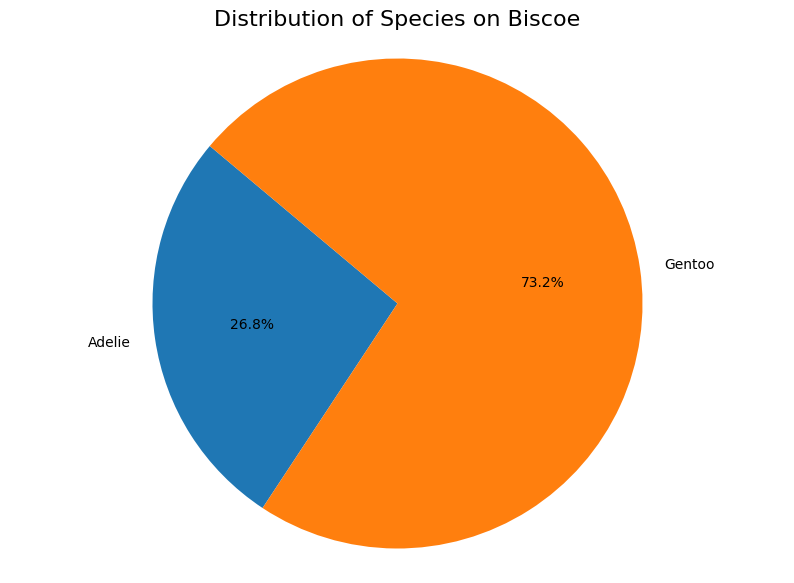

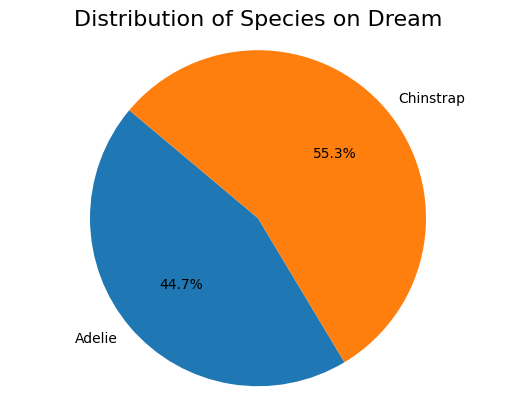

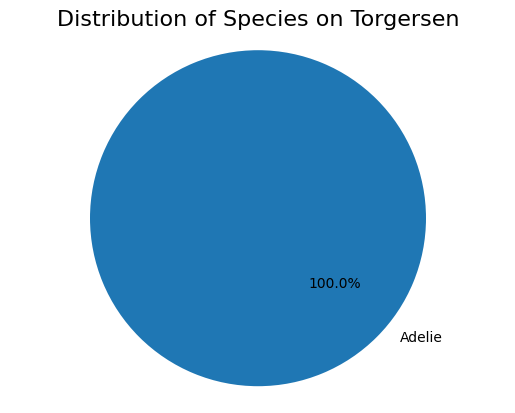

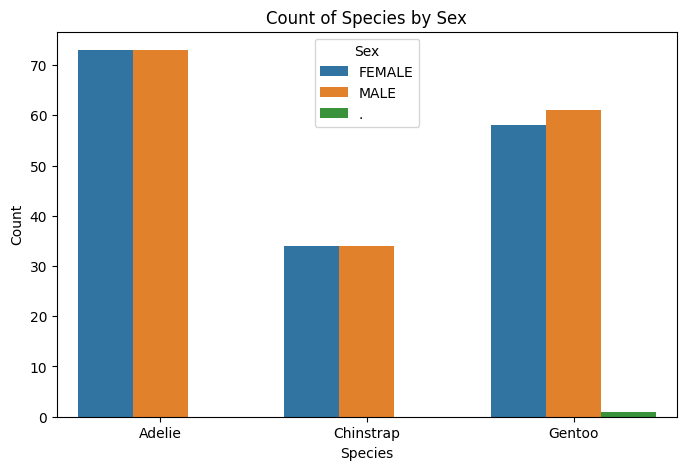

In [67]:
#6
plt.figure(figsize=(10, 7))
for island in island_species_counts['island'].unique():
    subset = island_species_counts[island_species_counts['island'] == island]
    plt.pie(subset['count'], labels=subset['species'], autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of Species on {island}', fontsize=16)
    plt.axis('equal')
    plt.show()
#code ini digunakan untuk memvisualisasikan pie chart dengan menampilkan jumlah spesies yang berada di masing masing island
plt.figure(figsize=(8, 5))
sns.barplot(x='species', y='count', hue='sex', data=species_sex_counts)
plt.title('Count of Species by Sex')
plt.xlabel('Species')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.show()

#code ini digunakan untuk memvisualisasikan dataset tentang jenis spesies dan jumlahnya
#jadi code ini dapat menampilkan perbandingan antara female dan male di masing masing spesies.
# Sedangkan sex . di dalam gentoo merupakan bawaan yang sudah ada di dalam dataset

7. Check unique value of our target variable

In [ ]:
#7
for col in ['species']:
  print(df[col].unique())
#code ini digunakan untuk mengecek dan melihat nilai unik yang terdapat di dalam kolom spesies

['Adelie' 'Chinstrap' 'Gentoo']


8. encode categorical columns and display the results

In [ ]:
#8
island_map = {'Torgersen': 1, 'Dream': 2, 'Biscoe': 3}
sex_map = {'MALE': 1, 'FEMALE': 2}

df['island'] = df['island'].map(island_map)
df['sex'] = df['sex'].map(sex_map)
df.head()

#code ini digunakan untuk mengencode kolom island dan sex untuk memudahkan analisa
#code ini merubah value kolom island dan sex menjadi integer (1,2,3) dan (1 dan 2)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,1,39.1,18.7,181.0,3750.0,1.0
1,Adelie,1,39.5,17.4,186.0,3800.0,2.0
2,Adelie,1,40.3,18.0,195.0,3250.0,2.0
4,Adelie,1,36.7,19.3,193.0,3450.0,2.0
5,Adelie,1,39.3,20.6,190.0,3650.0,1.0


9. encode the target column and display the results

In [ ]:
#9
species_map = {'Adelie': 1, 'Chinstrap': 2, 'Gentoo': 3}
df['species'] = df['species'].map(species_map)
df.head()
#code ini digunakan untuk mengencode kolom spesies untuk memudahkan analisa
#code ini merubah value kolom spesies menjadi integer (1,2,3)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,1,1,39.1,18.7,181.0,3750.0,1.0
1,1,1,39.5,17.4,186.0,3800.0,2.0
2,1,1,40.3,18.0,195.0,3250.0,2.0
4,1,1,36.7,19.3,193.0,3450.0,2.0
5,1,1,39.3,20.6,190.0,3650.0,1.0


10. create a heatmap to see the correlation and explain the conclusion

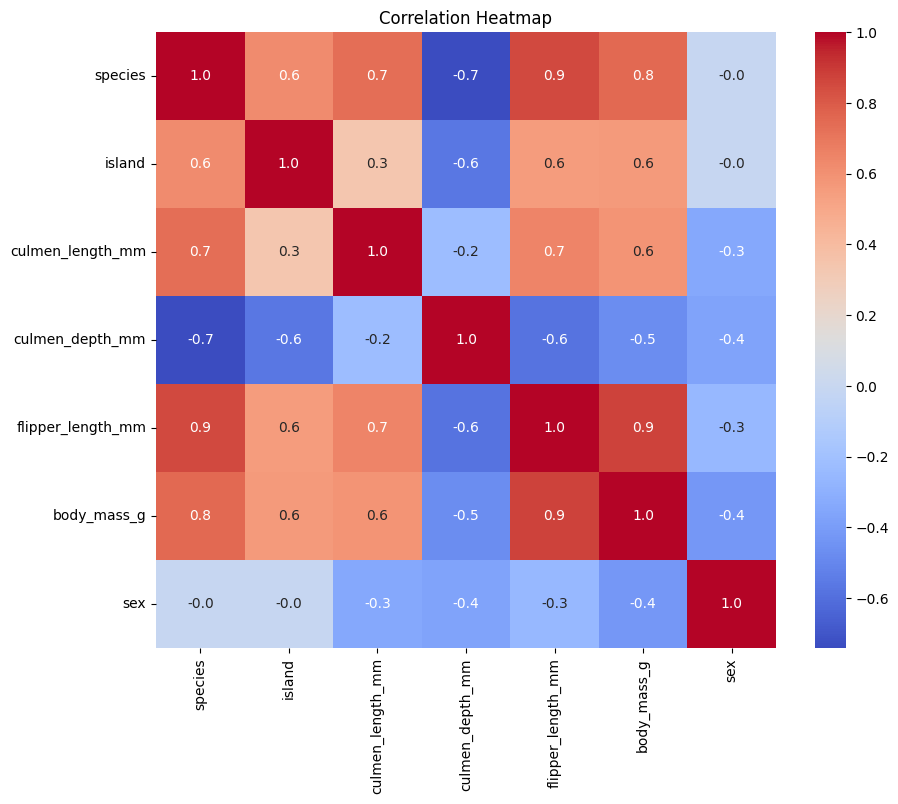

In [ ]:
#10
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title("Correlation Heatmap")
plt.show()
#code ini digunakan untuk memvisualisasikan heatmap untuk melihat hubungan antara kolom dataset
#code ini dapat digunakan untuk mengetahui kolerasi kolom untuk memudahkan dalam analisa

## Machine Learning

1. Splitting X and y

In [ ]:
#1
X = df.drop(['species'], axis = 1)
y = df['species']
#code ini digunakan untuk membagi dan memisahkan kolom dataset menjadi dua variabel. variabel x merupakan kolom independent dan kolom y merupakan kolom dependent

2. Split data into training and test set (test size 20% and random state 42) and check the shape of X_train and X_test

In [ ]:
#2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#code ini digunakan untuk membagi jumlah data untuk ditrain dan sebagian lainnya untuk di test
#besar pembagiannya juga dapat di rubah di dalam test size

In [ ]:
#3
X_train.shape, X_test.shape
#code ini untuk menampilkan jumlah data yang ada di dalam test dan train nya

((267, 6), (67, 6))

## Desicion Tree


---

a. Defining the model using criterion Entropy and Gini Index <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Check for overfitting and underfitting <br>
e. Visualize decision trees <br>
f. Confusion matrix <br>
g. Classification report <br>
h. Results and conclusion <br>

1. Criterion Entropy

In [ ]:
#Criterion Entropy
#a
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth = 3, random_state = 0)
clf_en.fit(X_train, y_train)

#code ini digunakan untuk melatih model desicion tree menggunakan entropy

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
#b
y_pred_en = clf_en.predict(X_test)
#membuat prediksi menggunakan model desicion tree yang telah dilatih sebelumnya.

In [ ]:
#c
print('Model accuracy score with criterion entropy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_en)))
#code ini digunakan untuk mengecek skor akurasinya

Model accuracy score with criterion entropy: 0.9701


In [ ]:
#d
print('Training set score: {0:0.4f}' .format(clf_en.score(X_train, y_train)))
print('Test set score: {0:0.4f}' .format(clf_en.score(X_test, y_test)))
#code ini dapat melihat seberapa baik model pohon keputusan dalam memprediksi pada data pelatihan dan data pengujian

Training set score: 0.9625
Test set score: 0.9701


[Text(0.5416666666666666, 0.875, 'x[3] <= 206.5\nentropy = 1.524\nsamples = 267\nvalue = [115, 55, 97]'),
 Text(0.3333333333333333, 0.625, 'x[1] <= 42.35\nentropy = 0.938\nsamples = 164\nvalue = [113.0, 50.0, 1.0]'),
 Text(0.4375, 0.75, 'True  '),
 Text(0.16666666666666666, 0.375, 'x[2] <= 16.7\nentropy = 0.078\nsamples = 105\nvalue = [104, 1, 0]'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.592\nsamples = 7\nvalue = [6, 1, 0]'),
 Text(0.25, 0.125, 'entropy = 0.0\nsamples = 98\nvalue = [98, 0, 0]'),
 Text(0.5, 0.375, 'x[4] <= 4075.0\nentropy = 0.736\nsamples = 59\nvalue = [9, 49, 1]'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.159\nsamples = 43\nvalue = [1, 42, 0]'),
 Text(0.5833333333333334, 0.125, 'entropy = 1.272\nsamples = 16\nvalue = [8, 7, 1]'),
 Text(0.75, 0.625, 'x[2] <= 17.65\nentropy = 0.417\nsamples = 103\nvalue = [2.0, 5.0, 96.0]'),
 Text(0.6458333333333333, 0.75, '  False'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 96\nvalue = [0, 0, 96]'),
 Text(

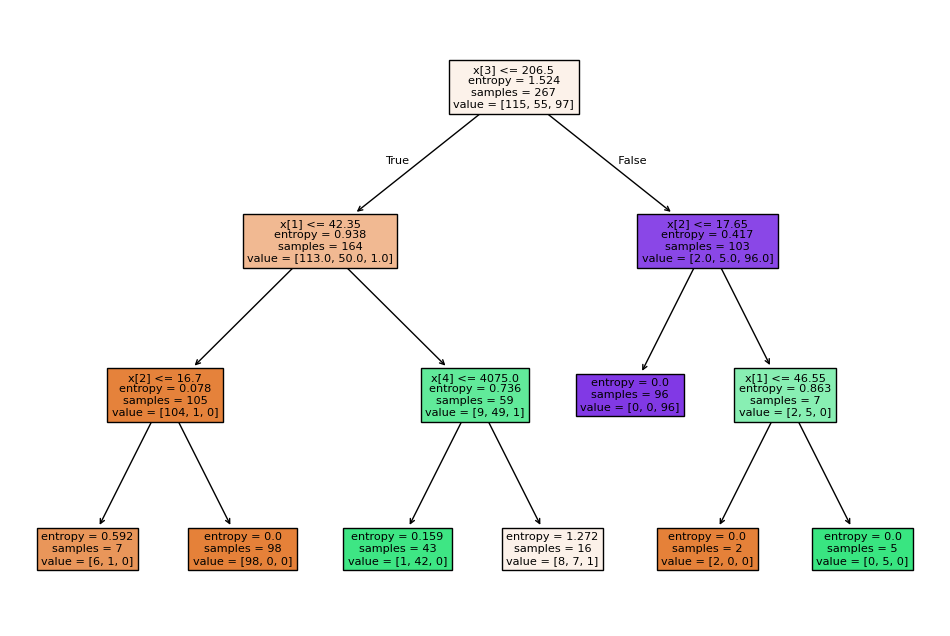

In [ ]:
#e
plt.figure(figsize = (12,8))
tree.plot_tree(clf_en.fit(X_train, y_train), filled = True)

#code ini digunakan untuk menunjukkan visualisasi dan menampilkan desicion tree

2. Criterion Gini index

In [ ]:
#a
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state = 0)
clf_gini.fit(X_train, y_train)
#code ini digunakan untuk melatih model desicion tree menggunakan gini

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
#b
y_pred_gini = clf_gini.predict(X_test)
#membuat prediksi menggunakan model desicion tree yang telah dilatih sebelumnya.

In [ ]:
#c
print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))
#code ini digunakan untuk mengecek skor akurasinya

Model accuracy score with criterion gini index: 0.9851


In [ ]:
#d
print('Training set score: {0:0.4f}' .format(clf_gini.score(X_train, y_train)))
print('Test set score: {0:0.4f}' .format(clf_gini.score(X_test, y_test)))
#code ini dapat melihat seberapa baik model pohon keputusan dalam memprediksi pada data pelatihan dan data pengujian

Training set score: 0.9738
Test set score: 0.9851


[Text(0.5416666666666666, 0.875, 'x[3] <= 206.5\ngini = 0.64\nsamples = 267\nvalue = [115, 55, 97]'),
 Text(0.3333333333333333, 0.625, 'x[1] <= 43.35\ngini = 0.432\nsamples = 164\nvalue = [113.0, 50.0, 1.0]'),
 Text(0.4375, 0.75, 'True  '),
 Text(0.16666666666666666, 0.375, 'x[1] <= 42.35\ngini = 0.068\nsamples = 113\nvalue = [109, 4, 0]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.019\nsamples = 105\nvalue = [104, 1, 0]'),
 Text(0.25, 0.125, 'gini = 0.469\nsamples = 8\nvalue = [5, 3, 0]'),
 Text(0.5, 0.375, 'x[0] <= 1.5\ngini = 0.18\nsamples = 51\nvalue = [4, 46, 1]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.117\nsamples = 49\nvalue = [2.0, 46.0, 1.0]'),
 Text(0.75, 0.625, 'x[2] <= 17.65\ngini = 0.129\nsamples = 103\nvalue = [2.0, 5.0, 96.0]'),
 Text(0.6458333333333333, 0.75, '  False'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 96\nvalue = [0, 0, 96]'),
 Text(0.8333333333333334, 0.375, 

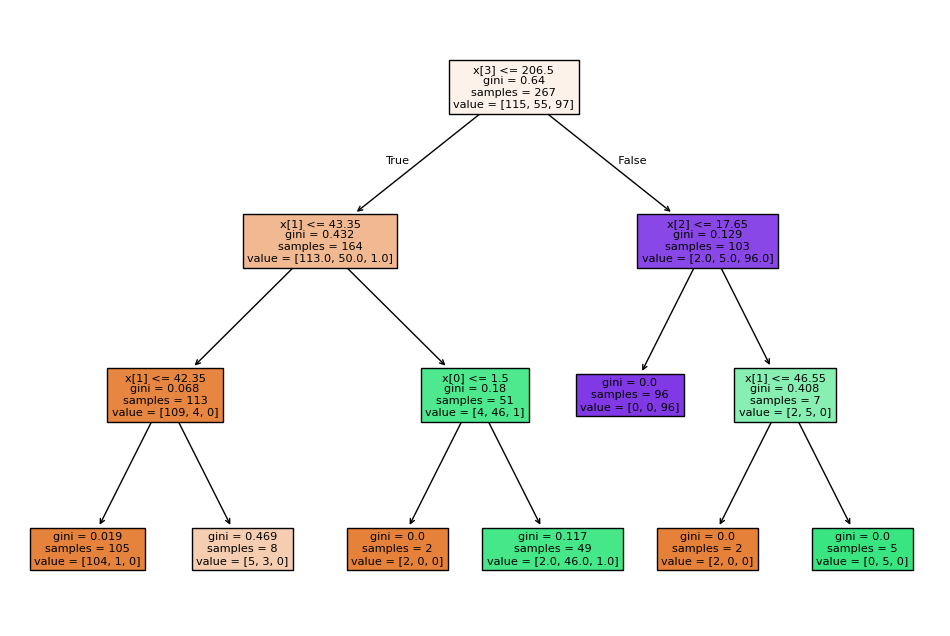

In [ ]:
#e
plt.figure(figsize = (12,8))
tree.plot_tree(clf_gini.fit(X_train, y_train), filled = True)
#code ini digunakan untuk menunjukkan visualisasi dan menampilkan desicion tree

3. Confusion matrix and classification report of criterion Entropy and Gini index

In [ ]:
#f
entropy = confusion_matrix(y_test, y_pred_en)
gini = confusion_matrix(y_test, y_pred_gini)
print('Confusion matrix entropy: \n', entropi)
print('Confusion matrix gini index: \n', gini)
#code ini digunakan untuk menampilkan confusin matrix dari entropy dan gini

Confusion matrix entropy: 
 [[30  1  0]
 [ 1 12  0]
 [ 0  0 23]]
Confusion matrix gini index: 
 [[31  0  0]
 [ 1 12  0]
 [ 0  0 23]]


In [ ]:
#g
print('Classification Report Entropy')
print(classification_report(y_test, y_pred_en))
print('Classification Report Gini Index')
print(classification_report(y_test, y_pred_gini))

Classification Report Entropy
              precision    recall  f1-score   support

           1       0.97      0.97      0.97        31
           2       0.92      0.92      0.92        13
           3       1.00      1.00      1.00        23

    accuracy                           0.97        67
   macro avg       0.96      0.96      0.96        67
weighted avg       0.97      0.97      0.97        67

Classification Report Gini Index
              precision    recall  f1-score   support

           1       0.97      1.00      0.98        31
           2       1.00      0.92      0.96        13
           3       1.00      1.00      1.00        23

    accuracy                           0.99        67
   macro avg       0.99      0.97      0.98        67
weighted avg       0.99      0.99      0.98        67



In [ ]:
#h
#Model dengan indeks Gini menunjukkan performa yang sedikit lebih baik dibandingkan model dengan entropy, terutama dalam hal akurasi dan precision.
#Kedua model menunjukkan kemampuan yang baik dalam mengklasifikasikan data, tetapi model dengan indeks Gini sedikit lebih unggul dalam mengidentifikasi kelas yang lebih sulit.

## Naive Bayes


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

library : from sklearn.naive_bayes import GaussianNB

In [57]:
#a
X_train = X_train.dropna()
y_train = y_train[X_train.index]
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [58]:
#b
nb_y_pred = nb_classifier.predict(X_test)

In [59]:
#c
cm = confusion_matrix(y_test, nb_y_pred)
print("Confusion Matrix:\n", cm)

#d
print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, nb_y_pred)))

Confusion Matrix:
 [[31  0  0]
 [ 0 13  0]
 [ 0  0 23]]
Accuracy Score: 1.0000


In [61]:
#e
print(classification_report(y_test, nb_y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [ ]:
#f
#Model Gaussian Naive Bayes menunjukkan kinerja yang sangat baik pada data pengujian, mencapai skor sempurna di semua metrik untuk setiap kelas.
#Ini menunjukkan akurasi dan ketepatan model dalam mengklasifikasikan setiap contoh. Namun, mengingat hasil yang sangat baik ini, penting untuk mempertimbangkan karakteristik dataset; kelas mungkin terpisah dengan baik, atau data mungkin kurang kompleks, yang memudahkan model untuk mencapai akurasi tinggi.

Good Luck :)